<a href="https://colab.research.google.com/github/JGMorato/NLP-Dom-Casmurro/blob/main/Dom_Casmurro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NLP - Contagem de palavras Dom Casmurro (Machado de Assis)

In [ ]:
#Importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk   #remoção de stopwords
nltk.download('stopwords')   #download do pacote de stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
livro = []

txt = open('Dom_Casmurro.txt', 'r')   #carregamento de arquivo local encontrado em: https://drive.google.com/file/d/1z1r62vXLDw0XbgRvIYOoWeQGv9_zGdIW/view?usp=sharing
for linha in txt:
  livro.append(linha)

sinais = ['\n', '.', ',', '(', ')', '?', '!', '\'', '[', ']', ';', ':']

for i in range(len(livro)):
  for j in sinais:
    livro[i] = livro[i].lower() #altera o texto para termos somente letras minúsculas
    livro[i] = livro[i].replace(j,'') #remove sinais
    livro[i] = ''.join([i for i in livro[i] if not i.isdigit()]) #remove dígitos

In [ ]:
livro2 = ''.join(livro).split() #une as frases e separa as palavras

stopwordsnltk = nltk.corpus.stopwords.words('portuguese')
livro3 = [palavra for palavra in livro2 if palavra not in stopwordsnltk] #retira as stopwords

#print(livro3)

In [ ]:
#Criação do dicionário de palavras
palavras = {}

#Contador de palavras
for i in livro3:
  palavras[i] = livro3.count(i)

#print(palavras)

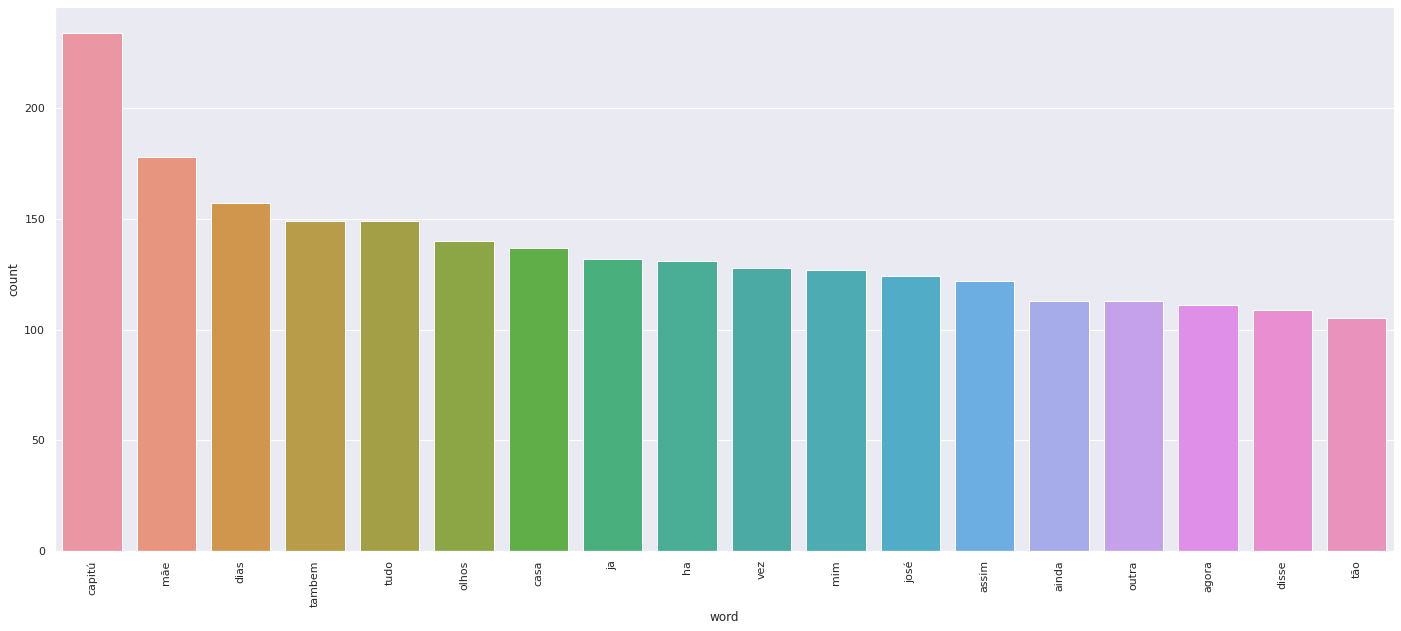

In [ ]:
#Gráfico de resultados
resultados = pd.DataFrame(palavras.items(),  columns=['word', 'count']).sort_values('count',ascending=False)
resultados = resultados[resultados['count'] > 100] # somente termos com mais de 100 ocorrências

plt.figure(figsize=(24,10))
sns.barplot(x=resultados.word,y=resultados['count'])
plt.xticks(rotation=90) 

plt.show()